# Natural Language Processing

### It allows us to group data on the basis of similar features. We use TF and IDF to improve bag of words. 

In [1]:
# Term frequncy = TF(d,t)  = number of occurences of term t in document d.

# inverse document frequency = log(D,t) = d: total number of documents. and t : number of documents with term t.  

In [2]:
# conda install nltk

In [3]:
import nltk

In [4]:
# nltk.download_shell()        # from this download stopwords

In [5]:
# UCL : site to check more datasets

In [6]:
messages = [ line.rstrip() for line in open('C:/Users/tyagi/Downloads/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]

In [7]:
len(messages)

5574

In [8]:
messages[1]

'ham\tOk lar... Joking wif u oni...'

In [9]:
for mess_no,messages in enumerate(messages[:10]):
    print(mess_no,messages)
    print('/n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
/n
1 ham	Ok lar... Joking wif u oni...
/n
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
/n
3 ham	U dun say so early hor... U c already then say...
/n
4 ham	Nah I don't think he goes to usf, he lives around here though
/n
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
/n
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
/n
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
/n
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C

In [10]:
# spam and ham

In [11]:
messages[0]

's'

In [12]:
import pandas as pd

In [13]:
messages = pd.read_csv('C://Users//tyagi//Downloads//Py-DS-ML-Bootcamp-master//Refactored_Py_DS_ML_Bootcamp-master//20-Natural-Language-Processing//smsspamcollection//SMSSpamCollection',
                 sep = '\t',names=['label','messg'])

In [14]:
messages.head(2)

,label,messg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [15]:
messages.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [16]:
messages.describe()

,label,messg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
messages.groupby('label').describe().T

label                            ham  \
messg count                     4825   
      unique                    4516   
      top     Sorry, I'll call later   
      freq                        30   

label                                                      spam  
messg count                                                 747  
      unique                                                653  
      top     Please call our customer service representativ...  
      freq                                                    4

In [18]:
messages['length'] = messages['messg'].apply(lambda x : len(x))

In [19]:
messages['messg'][1]

'Ok lar... Joking wif u oni...'

In [20]:
messages.head(6)

,label,messg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147


In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

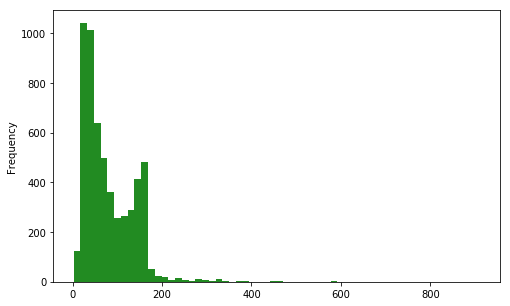

In [25]:
plt.figure(figsize=(8,5))
messages['length'].plot(kind='hist',bins=60, color ='forestgreen')

In [26]:
messages[messages['length']==messages['length'].max()].messg.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002092EDC1A20>,
      dtype=object)

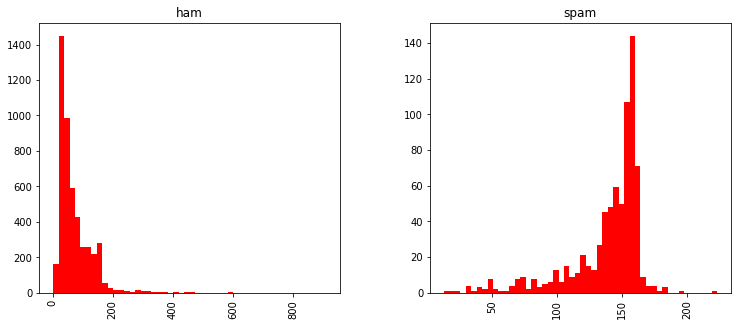

In [28]:
messages.hist(column='length',by='label',bins=50,figsize=(12,5), color ='red')

In [29]:
# the data is in string form , we need to transform this into numerical/vector( bag of words)  form for classification.

In [30]:
import string

In [31]:
mess = 'sample message! it has punctuation.'

In [32]:
nopuc = [c for c in mess if c not in string.punctuation]

In [33]:
from nltk.corpus import stopwords

In [34]:
nopuc = ''.join(nopuc)   # ''.join(var) : it joins every element of the variable by mentioning the joining coeff = '' .

In [35]:
print(nopuc)

sample message it has punctuation


In [36]:
nopuc.split()

['sample', 'message', 'it', 'has', 'punctuation']

In [37]:
clean_mess = [ word for word in nopuc.split() if word.lower() not in stopwords.words('english')]

In [38]:
clean_mess

['sample', 'message', 'punctuation']

In [39]:
def clean(i):
    nopunc = [word for word in i if word not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_messs = [h for h in nopunc.split() if h.lower() not in stopwords.words('english')]
    return clean_messs
        
        

In [40]:
messages['clean_words'] = messages['messg'].apply(clean)

In [41]:
messages.head()

,label,messg,length,clean_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


In [42]:
# stemming method : if there are words like run,ran,running in our string, it will return one word for these that is run.

In [43]:
# text normalization method is performed above. 

In [44]:
# now converting clean_words into vectors so that machine learning can understand

# vectorizatrion

In [45]:
# clean_words is a list of tokens i.e. lemmas

In [46]:
# TF
# IDF
# L2 norm

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
bow_transformer = CountVectorizer(analyzer=clean).fit(messages['messg'])

In [49]:
len(bow_transformer.vocabulary_)   # checking number of words in our vector matrix

11425

In [50]:
messg4 = messages['messg'][3]

In [51]:
messg4

'U dun say so early hor... U c already then say...'

In [52]:
bow4 = bow_transformer.transform([messg4])

In [53]:
print(bow4)   # 7 unique words in messg4 after removing stopwords.

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [54]:
# to check which word in messg4  appers twice
bow_transformer.get_feature_names()[9554]

'say'

In [55]:
message_trans = bow_transformer.transform(messages['messg'])

In [56]:
message_trans.shape

(5572, 11425)

In [57]:
message_trans.nnz   # no.of non-zero 

50548

In [58]:
sparsity = 100 * message_trans.nnz /(message_trans.shape[0] * message_trans.shape[1])

In [59]:
sparsity   # how many non zero values are there.

0.07940295412668218

In [60]:
# TF and IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
tfidf_transform = TfidfTransformer().fit(message_trans)

In [62]:
tfidf4 = tfidf_transform.transform(bow4)

In [63]:
print(tfidf4)     # weight value of each word in whole document.

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [64]:
tfidf_transform.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [65]:
messg_tfidf = tfidf_transform.transform(message_trans)

In [66]:
# naive based classifier
from sklearn.naive_bayes import MultinomialNB

In [67]:
spam_detect_model = MultinomialNB().fit(messg_tfidf,messages['label'])

In [68]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [69]:
messages.label[3]

'ham'

In [70]:
all_msg_pred = spam_detect_model.predict(messg_tfidf)

In [71]:
all_msg_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [72]:
# we did these prediction on our training data only.
# now we will split data into train test and do predictions on test data as well.

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['messg'],messages['label'],test_size=0.3)

In [75]:
# pipeline : we dont need to repeat above process.

from sklearn.pipeline import Pipeline

In [76]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=clean)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [77]:
pipeline.fit(msg_train,label_train)    # training and fitting the data.

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function clean at 0x000002092F443E18>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [78]:
predict = pipeline.predict(msg_test)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report

In [80]:
confusion_matrix(label_test,predict)

array([[1444,    0],
       [  59,  169]], dtype=int64)

In [88]:
print(classification_report(label_test,predict))


# Accuracy = 96%

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1444
        spam       1.00      0.74      0.85       228

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672



In [82]:
new_mesg = "SIX chances to win CASH! From 100 to 20,000 "

In [83]:
new_mesg1 = bow_transformer.transform([new_mesg])

In [84]:
new_mesg2 = tfidf_transform.transform(new_mesg1)

In [85]:
prediction = spam_detect_model.predict(new_mesg2)

In [86]:
prediction

array(['spam'], dtype='<U4')

In [87]:
messages.iloc[11]  

label                                                       spam
messg          SIX chances to win CASH! From 100 to 20,000 po...
length                                                       136
clean_words    [SIX, chances, win, CASH, 100, 20000, pounds, ...
Name: 11, dtype: object